## Question: Relation among movie's `revenue`, `genre` and `runtime`

In [2]:
import pandas as pd

df = pd.read_csv("Datasets/IMDB-Movie-Data.csv")
df.columns

Index(['Rank', 'Title', 'Genre', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### Create a dataframe about `Genre`, `Runtime`, and `Revenue`

In [30]:
df = pd.read_csv("Datasets/IMDB-Movie-Data.csv")

df = df.dropna(subset=["Revenue (Millions)"])
df["Genre"] = df["Genre"].str.split("|")
df = df.explode("Genre").reset_index()
genre_runtime_revenue_df = df[["Genre", "Runtime (Minutes)", "Revenue (Millions)"]].copy()
genre_runtime_revenue_df.sort_values(by="Revenue (Millions)", ascending=False, inplace=True)
genre_runtime_revenue_df

,Genre,Runtime (Minutes),Revenue (Millions)
89,Fantasy,136,936.63
88,Adventure,136,936.63
87,Action,136,936.63
251,Action,162,760.51
252,Adventure,162,760.51
...,...,...,...
1587,Drama,84,0.01
2239,Thriller,99,0.01
2190,Crime,95,0.00
2191,Drama,95,0.00


In [33]:
genre_runtime_revenue_df.iloc[:15]

,Genre,Runtime (Minutes),Revenue (Millions)
89,Fantasy,136,936.63
88,Adventure,136,936.63
87,Action,136,936.63
251,Action,162,760.51
252,Adventure,162,760.51
253,Fantasy,162,760.51
1000,Action,124,652.18
1002,Sci-Fi,124,652.18
1001,Adventure,124,652.18
97,Sci-Fi,143,623.28


In [75]:
genre_runtime_revenue_df["Genre"].unique()

array(['Fantasy', 'Adventure', 'Action', 'Sci-Fi', 'Drama', 'Crime',
       'Animation', 'Comedy', 'Thriller', 'Mystery', 'Family',
       'Biography', 'Horror', 'Sport', 'War', 'Romance', 'Music',
       'History', 'Western', 'Musical'], dtype=object)

### Pick some interest genres

In [81]:
interested_genres = ["Action", "Fantasy", "Adventure", "Sci-Fi", "Family", "Horror"]

genre_runtime_revenue_df = genre_runtime_revenue_df[
    genre_runtime_revenue_df["Genre"].isin(interested_genres)
]
genre_runtime_revenue_df["Genre"].unique()

array(['Fantasy', 'Adventure', 'Action', 'Sci-Fi', 'Family', 'Horror'],
      dtype=object)

### Plot the relation among `Genre`, `Runtime`, and `Revenue`

#### Plot with different number of movies

In [92]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

def partial_plot(
    df: pd.DataFrame,
    end_index: int,
    ax: mpl.axes._axes.Axes,
    legend=False,
    cmap_type="tab10"
):
    '''
    plot from the beginning of given df to the end_index 
    '''
    part_of_df = df.iloc[:end_index]
    genres = part_of_df["Genre"].unique()
    colors = plt.get_cmap(cmap_type, len(genres));

    for i, genre in enumerate(genres):
        subset = part_of_df[part_of_df["Genre"] == genre]
        ax.scatter(
            subset["Runtime (Minutes)"], subset["Revenue (Millions)"],
            color=colors(i),
            label=genre,
            alpha=1
        );
    if legend:
        ax.legend();

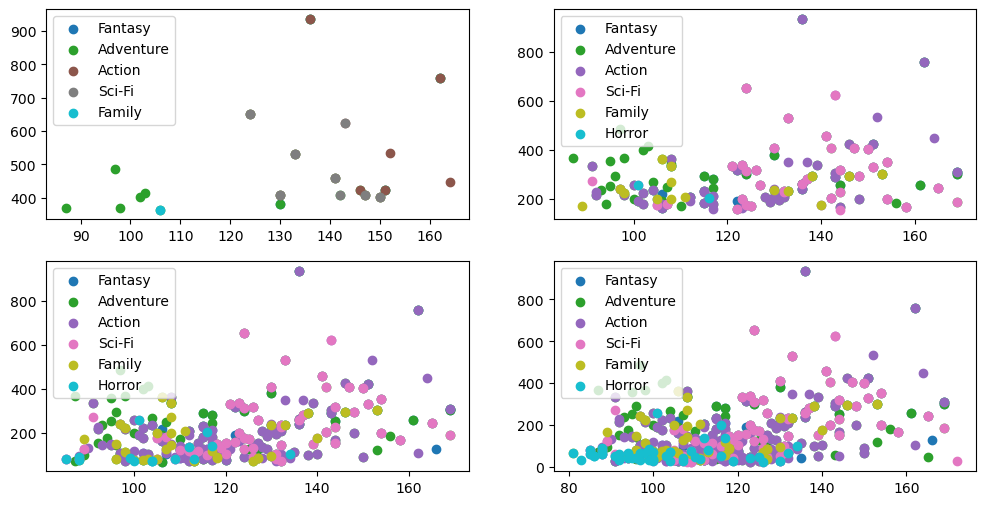

In [93]:
plot_end_index = range(
    round(len(genre_runtime_revenue_df) / 20),
    len(genre_runtime_revenue_df),
    round(len(genre_runtime_revenue_df) / 4)
)

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, end_index in enumerate(plot_end_index):
    partial_plot(
        genre_runtime_revenue_df,
        end_index,
        axs[i // 2, i % 2],
        legend=True
    )

### Plot top 

Text(0.5, 0, 'Minute')

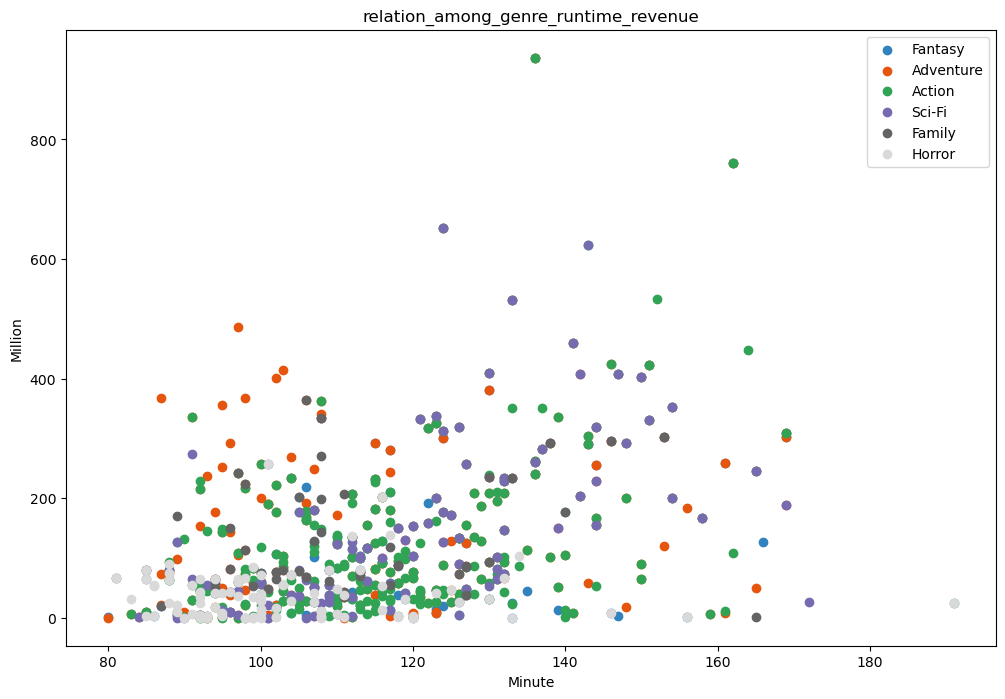

In [97]:
TOP_REVENUE = 1000

fig, ax = plt.subplots(figsize=(12, 8))
partial_plot(
    genre_runtime_revenue_df,
    end_index=TOP_REVENUE,
    ax=ax,
    legend=True,
    cmap_type="tab20c"
)

ax.set_title("relation_among_genre_runtime_revenue")
ax.set_ylabel("Million")
ax.set_xlabel("Minute")

### `genre` & `revenue` relation

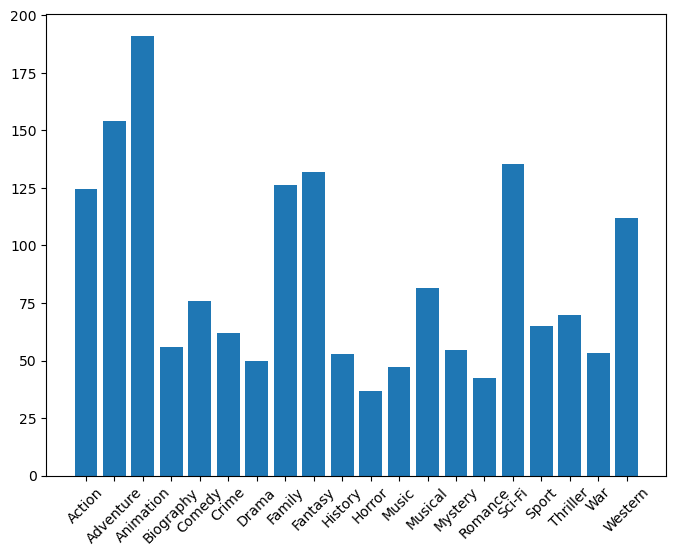

In [6]:
genre_and_revenue_df = genre_runtime_revenue_df.copy()
genre_and_revenue_df["Genre"] = genre_and_revenue_df["Genre"].str.split("|")
genre_and_revenue_df = genre_and_revenue_df.explode("Genre")
genre_and_revenue_df = genre_and_revenue_df.dropna(subset="Revenue (Millions)")
genre_and_revenue_df = genre_and_revenue_df.groupby("Genre")["Revenue (Millions)"].mean().reset_index()

# Plotting bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(
    genre_and_revenue_df["Genre"],
    genre_and_revenue_df["Revenue (Millions)"]
)
ax.tick_params("x", rotation=45)

### `Runtime` & `Revenue` relation

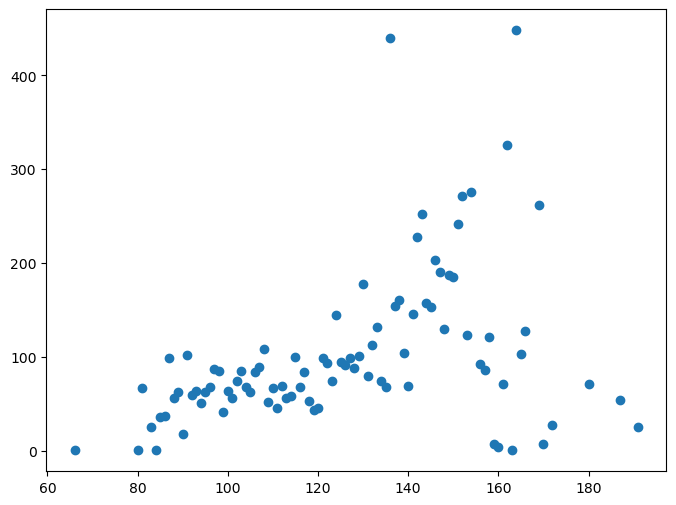

In [7]:
df = pd.read_csv("Datasets/IMDB-Movie-Data.csv")
runtime_and_revenue_df = genre_runtime_revenue_df.copy()
runtime_and_revenue_df = runtime_and_revenue_df.dropna(subset=["Revenue (Millions)"])
runtime_and_revenue_df = runtime_and_revenue_df.groupby("Runtime (Minutes)")
runtime_and_revenue_df = runtime_and_revenue_df["Revenue (Millions)"].mean()
runtime_and_revenue_df = runtime_and_revenue_df.reset_index()

# plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(
    runtime_and_revenue_df["Runtime (Minutes)"],
    runtime_and_revenue_df["Revenue (Millions)"]
)

### Save both to csv file as two datasets

In [8]:
from pathlib import Path
data = {
    "genre_vs_revenue.csv": genre_and_revenue_df,
    "runtime_vs_revenue.csv": runtime_and_revenue_df
}

for file_name in data.keys():
    file_path = Path(file_name)
    if not file_path.exists():
        data[file_name].to_csv(file_path)

### Load datasets

In [9]:
genre_and_revenue_df = pd.read_csv("genre_vs_revenue.csv")
runtime_and_revenue_df = pd.read_csv("runtime_vs_revenue.csv")

print(f"Genre vs Revenue\n{genre_and_revenue_df.head()}\n---------------\n")
print(f"Runtime vs Revenue\n{runtime_and_revenue_df.head()}")

Genre vs Revenue
   Unnamed: 0      Genre  Revenue (Millions)
0           0     Action          124.494476
1           1  Adventure          154.177024
2           2  Animation          191.223404
3           3  Biography           55.801600
4           4     Comedy           75.750784
---------------

Runtime vs Revenue
   Unnamed: 0  Runtime (Minutes)  Revenue (Millions)
0           0                 66            0.290000
1           1                 80            0.535000
2           2                 81           67.095000
3           3                 83           32.673333
4           4                 84            0.225000
